# 1A.e - Enoncé 23 octobre 2018 (2)

Correction du second énoncé de l'examen du 23 octobre 2018. 

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

On sait d'après les dernières questions qu'il faudra tout répéter plusieurs fois. On prend le soin d'écrire chaque question dans une fonction.

## Q1 - échantillon aléatoire

Générer un ensemble de $N=1000$ couples aléatoires $(X_i,Y_i)$ qui vérifient :

* $X_i$ suit une loi normale de variance 1.
* $Y_i = 2 X_i + \epsilon_i$ où $\epsilon_i$ suit une loi normale de variance 1.

In [2]:
import numpy.random as rnd
import numpy

def random_mat(N):
    mat = numpy.zeros((N, 2))
    mat[:, 0] = rnd.normal(size=(N,))
    mat[:, 1] = mat[:, 0] * 2 + rnd.normal(size=(N,))
    return mat

N = 1000
mat = random_mat(N)
mat[:5]

array([[-1.10137046, -4.42070834],
       [ 0.80595011,  2.40094346],
       [ 0.16755408,  0.96006092],
       [-0.79968987, -0.31151998],
       [ 0.29505452,  0.67395666]])

## Q2 - matrice m1

On définit la matrice $M \in \mathbb{M}_{N,2}(\mathbb{R})$ définie par les deux vecteurs colonnes $(X_i)$ et $(Y_i)$. Choisir aléatoirement 20 valeurs dans cette matrice et les remplacer par ``numpy.nan``. On obtient la matrice $M_1$.

In [3]:
import random

def build_m1(mat, n=20):
    mat = mat.copy()
    positions = []
    for i in range(0, n):
        h = random.randint(0, mat.shape[0] * mat.shape[1] - 1)
        pos = h % mat.shape[0], h // mat.shape[0]
        positions.append(pos)
        mat[pos] = numpy.nan
    return mat, positions

m1, positions = build_m1(mat)
p = positions[0][0]
m1[max(p-2, 0):min(p+3, mat.shape[0])]

array([[-0.92143485, -2.23568339],
       [        nan, -9.27992254],
       [-0.86902908,         nan],
       [-1.19325316, -2.66367887],
       [-0.15739665, -0.76742943]])

## Q3 - moyenne

Calculer $\mathbb{E}{X} = \frac{1}{N}\sum_i^N X_i$ et $\mathbb{E}Y = \frac{1}{N}\sum_i^N Y_i$.

In [4]:
def mean_no_nan(mat):
    res = []
    for i in range(mat.shape[1]):
        ex = numpy.mean(mat[~numpy.isnan(mat[:, i]), i])
        res.append(ex)
    return numpy.array(res)

mean_no_nan(m1)

array([0.01515716, 0.05384911])

## Q4 - matrice m2

Remplacer les valeurs manquantes de la matrice $M_1$ par la moyenne de leurs colonnes respectives. On obtient la matrice $M_2$.

In [5]:
def build_m2(mat):
    means = mean_no_nan(mat)
    m1 = mat.copy()
    for i in range(len(means)):
        m1[numpy.isnan(m1[:, i]), i] = means[i]
    return m1

m2 = build_m2(m1)
m2[max(p-2, 0):min(p+3, mat.shape[0])]

array([[-0.92143485, -2.23568339],
       [ 0.01515716, -9.27992254],
       [-0.86902908,  0.05384911],
       [-1.19325316, -2.66367887],
       [-0.15739665, -0.76742943]])

## Q5 - x le plus proche

On considère le point de coordonnées $(x, y)$, écrire une fonction qui retourne le point de la matrice $M$ dont l'abscisse est la plus proche de $x$.

In [6]:
def plus_proche(mat, x, col, colnan):
    mini = None
    for k in range(mat.shape[0]):
        if numpy.isnan(mat[k, col]) or numpy.isnan(mat[k, colnan]):
            continue
        d = abs(mat[k, col] - x)
        if mini is None or d < mini:
            mini = d
            best = k
    return best

plus_proche(m1, m1[10, 0], 0, 1)

10

## Q6 - matrice m3

Pour chaque $y$ manquant, on utilise la fonction précédente pour pour retourner le point dont l'abscisse et la plus proche et on remplace l'ordonnée $y$ par celle du point trouvé. On fait de même avec les $x$ manquant.
On construit la matrice ainsi $M_3$ à partir de $M_1$.

In [7]:
def build_m3(mat):
    mat = mat.copy()
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if numpy.isnan(mat[i, j]):
                col = 1-j
                if numpy.isnan(mat[i, col]):
                    # deux valeurs nan, on utilise la moyenne
                    mat[i, j] = numpy.mean(mat[~numpy.isnan(mat[:,j]), j])
                else:
                    pos = plus_proche(mat, mat[i, col], col, j)
                    mat[i, j] = mat[pos, j]
    return mat

m3 = build_m3(m1)
m3[max(p-2, 0):min(p+3, mat.shape[0])]

array([[-0.92143485, -2.23568339],
       [-3.08879967, -9.27992254],
       [-0.86902908, -1.15489811],
       [-1.19325316, -2.66367887],
       [-0.15739665, -0.76742943]])

## Q7 - norme

On a deux méthodes pour compléter les valeurs manquantes, quelle est la meilleure ? Il faut vérifier numériquement en comparant $\parallel M-M_2 \parallel^2$ et $\parallel M-M_3 \parallel^2$.

In [8]:
def distance(m1, m2):
    d = m1.ravel() - m2.ravel()
    return d @ d

d2 = distance(mat, m2)
d3 = distance(mat, m3)
d2, d3

(95.81918398037273, 25.626985367809095)

## Q8 - répétition

Une experience réussie ne veut pas dire que cela fonctionne. Recommencer 10 fois en changeant le nuages de points et les valeurs manquantes ajoutées.

In [9]:
def repetition(N=1000, n=20, nb=10):
    res = []
    for i in range(nb):
        mat = random_mat(N)
        m1, _ = build_m1(mat, n)
        m2 = build_m2(m1)
        m3 = build_m3(m1)
        d2, d3 = distance(mat, m2), distance(mat, m3)
        res.append((d2, d3))
    return numpy.array(res)

repetition()

array([[ 40.66440151,  11.32561039],
       [ 41.89574941,  42.19303295],
       [ 87.15693553,  28.41977157],
       [ 45.71680854,  41.95612925],
       [180.38492249,  46.48977323],
       [ 65.89060572,  35.89541904],
       [ 46.77217532,  27.91270314],
       [ 21.51748989,  12.03493298],
       [ 72.88305983,   9.27739006],
       [ 34.76841102,  37.94891222]])

## Q9 - plus de valeurs manquantes

Et si on augmente le nombre de valeurs manquantes, l'écart se creuse-t-il ou se réduit -il ? Montrez-le numériquement.

In [10]:
diff = []
for n in range(10, 100, 10):
    print(n)
    res = repetition(n=n, nb=10)
    diff.append(res.mean(axis=0) / n)
diff = numpy.array(diff)
diff[:5]

10
20
30
40
50
60
70
80
90


array([[2.42013858, 1.55624525],
       [2.67010659, 1.25820284],
       [3.04696071, 1.30007394],
       [3.28685532, 1.45165264],
       [3.01745393, 1.22368009]])

In [11]:
%matplotlib inline

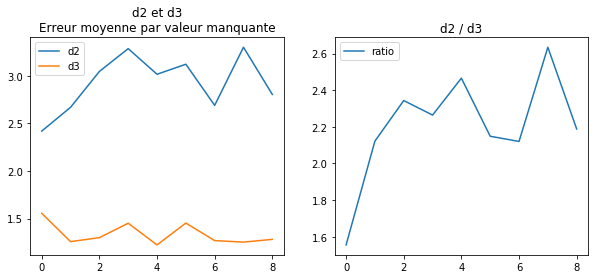

In [13]:
import pandas
df = pandas.DataFrame(diff, columns=["d2", "d3"])
df["ratio"] = df["d2"] / df["d3"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df[["d2", "d3"]].plot(ax=ax[0])
df[["ratio"]].plot(ax=ax[1])
ax[0].set_title("d2 et d3\nErreur moyenne par valeur manquante")
ax[1].set_title("d2 / d3");

Plus il y a de valeurs manquantes, plus le ratio tend vers 1 car il y a moins d'informations pour compléter les valeurs manquantes autrement que 

## Q10

Votre fonction de la question 5 a probablement un coût linéaire. Il est probablement possible de faire mieux, si oui, il faut préciser comment et ce que cela implique sur les données. Il ne faut pas l'implémenter.

Il suffit de trier le tableau et d'utiliser une recherche dichotomique. Le coût du tri est négligeable par rapport au nombre de fois que la fonction ``plus_proche`` est utilisée.